In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('jobs_in_data.csv')
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [ ]:
df.info()
"""The df.info() method in pandas is used to retrieve concise information about a DataFrame. It provides a summary that includes:

Index dtype: The data type of the index.
Column dtypes: The data types of each column.
Non-null values: The count of non-null values in each column.
Memory usage: The amount of memory used by the DataFrame."""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [ ]:
top_3_countries = df['company_location'].value_counts(normalize = True).head(3)
top_3_countries
#It counts the occurrences of each unique value (i.e., each unique country in this case) in the column

United States     0.869268
United Kingdom    0.047996
Canada            0.024158
Name: company_location, dtype: float64

In [ ]:
top_3_countries.sum()
top_3_countries['United States']

0.8692677712453234

In [ ]:
df1= pd.DataFrame(index =df['work_year'].unique())

for year in df1.index:
    total = 0
    for country in top_3_countries.index:
        df1.loc[year,country] = df[(df['company_location'] == country) & (df['work_year'] == year)].shape[0]
        total += df1.loc[year,country]

    df1.loc[year,'Others'] = df[df['work_year'] == year].shape[0] - total

df1

,United States,United Kingdom,Canada,Others
2023,6663.0,340.0,174.0,276.0
2022,1339.0,90.0,38.0,167.0
2020,33.0,4.0,3.0,31.0
2021,97.0,15.0,11.0,74.0


<Axes: >

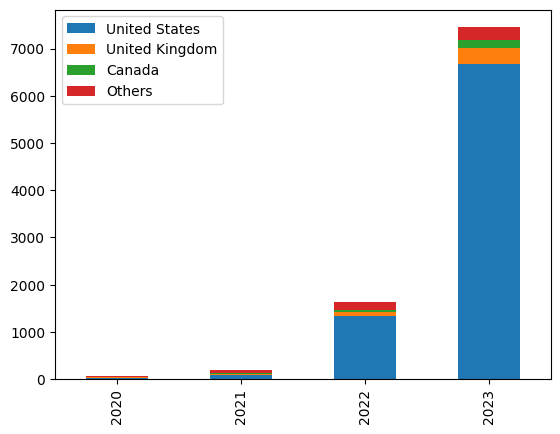

In [ ]:
df1.sort_index().plot(kind='bar', stacked=True)

In [ ]:
df['experience_level'].value_counts()

Senior         6709
Mid-level      1869
Entry-level     496
Executive       281
Name: experience_level, dtype: int64

In [ ]:
exp_levels = df['experience_level'].value_counts().sort_values(ascending=False).index
exp_levels_color = sns.color_palette(n_colors = len(exp_levels)).as_hex()
exp_levels

Index(['Senior', 'Mid-level', 'Entry-level', 'Executive'], dtype='object')

<Axes: xlabel='salary_in_usd', ylabel='Count'>

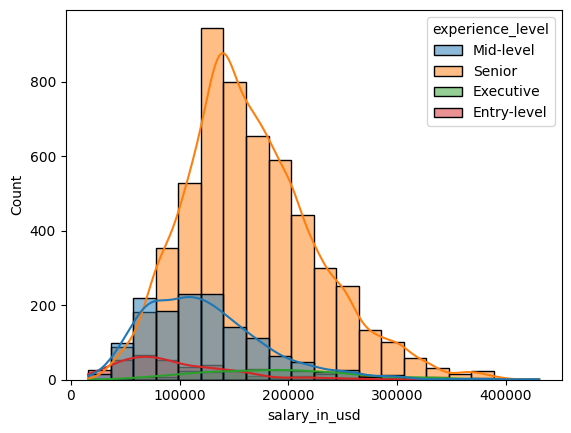

In [ ]:
  sns.histplot(
    data = df[df['work_year']==2023],
    x = 'salary_in_usd',
    hue = 'experience_level',
    kde = True,
    bins = 20
)

In [ ]:
plt.figure(figsize=(15,5))

top_5_countries = df[df['work_year']==2023]['company_location'].value_counts(normalize = True).head(5)
top_5_countries

United States     0.894002
United Kingdom    0.045619
Canada            0.023346
Spain             0.008721
Germany           0.003891
Name: company_location, dtype: float64

<Figure size 1500x500 with 0 Axes>

In [ ]:
boxplot_dataframe = df[(df['work_year'] == 2023) & (df['company_location'].isin(top_5_countries.index))]
boxplot_dataframe

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
7492,2023,Machine Learning Engineer,Machine Learning and AI,USD,134500,134500,United States,Senior,Full-time,In-person,United States,L
7493,2023,Data Scientist,Data Science and Research,USD,130000,130000,United States,Mid-level,Full-time,In-person,United States,M
7494,2023,Data Scientist,Data Science and Research,USD,90000,90000,United States,Mid-level,Full-time,In-person,United States,M
7495,2023,Data Engineer,Data Engineering,USD,160000,160000,United States,Entry-level,Full-time,In-person,United States,M


In [ ]:
medians = boxplot_dataframe.groupby('company_location')['salary_in_usd'].median().sort_values(ascending=False).index
medians

Index(['United States', 'Canada', 'Germany', 'United Kingdom', 'Spain'], dtype='object', name='company_location')

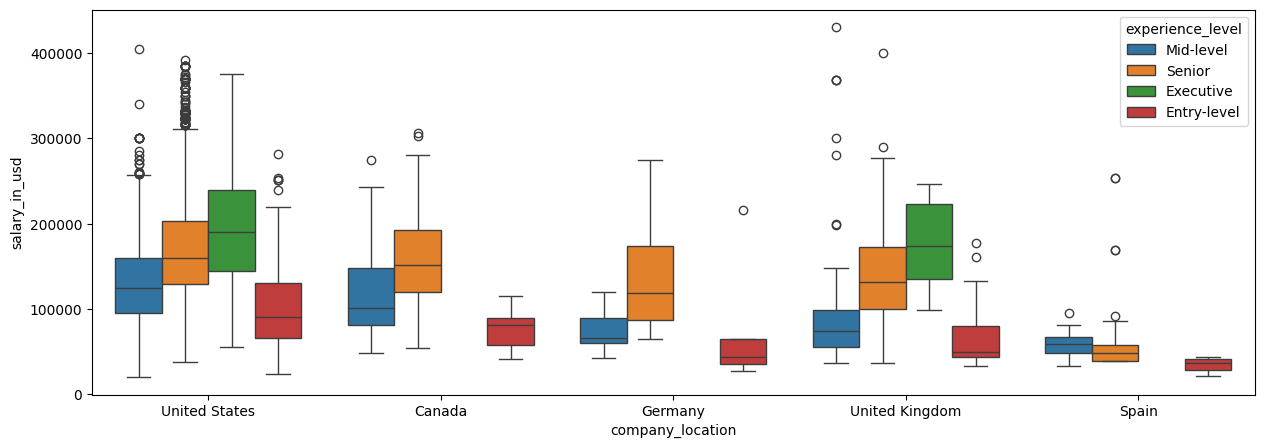

In [ ]:
plt.figure(figsize=(15,5))

sns.boxplot(
    data = boxplot_dataframe,
    x = 'company_location',
    y = 'salary_in_usd',
    hue = 'experience_level',
    order = medians
)
plt.show()
